Welcome to the hands-on lab for **Building a Tekton Pipeline**. 
* In this lab, you will create a simple Tekton pipeline with one task in Step 1 and then add a parameter to it in Step 4.
* You will learn best practices for structuring a Tekton pipeline project.
* How to author Tekton pipelines and tasks so that they are easy to use and parameterize.
* You will see that Tekton allows you to reuse your pipeline-as-code artifacts.
* You will look at practical approaches to publishing your pipeline and task definitions to a Git repository.

# Learning Objectives

After completing this lab, you will be able to:
* Create a base pipeline and task to echo a message.
* Apply parameters to the task and pipeline.
* Apply additional parameters to a pipeline to clone a Git repository.

# Prerequisites

You will need the following to complete the exercises in this lab:
* A basic understanding of YAML
* A GitHub account
* An intermediate-level knowledge of CLIs

# Set Up the Lab Environment

## Clone the Code Repo

Now, get the code that you need to test. 

To do this, use the `git clone` command to clone the Git repository:
```
git clone https://github.com/ibm-developer-skills-network/wtecc-CICD_PracticeCode.git
```
Your output should look similar to the image below:
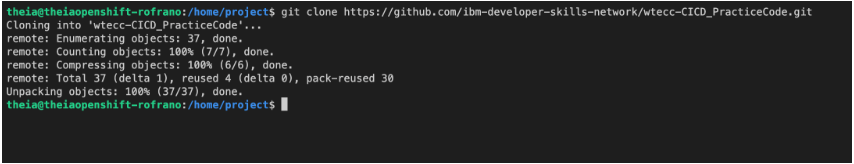

## Change to the Labs Directory

Once you have cloned the repository, change to the labs directory.
```
cd wtecc-CICD_PracticeCode/labs/01_base_pipeline/
```

## Navigate to the Labs Folder

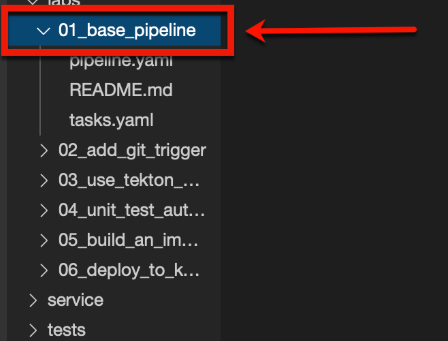
* Navigate to the `labs/01_base_pipeline` folder in left explorer panel. 
* All of your work will be completed with the files in this folder.
* ou are now ready to start the lab.

# Step 1: Create an echo Task

In true computer programming tradition, the first task you create will echo **"Hello World!"** to the console.
* There is starter code in the `labs/01_base_pipeline` folder for a task and a pipeline. 
* Navigate to this folder in left explorer panel, and open the **`tasks.yaml`** file to edit it.

It should look like this:
```
apiVersion: tekton.dev/v1beta1
kind: Task
metadata:
  name: <place-name-here>
spec:
  steps:
```
You will now create a **hello-world** task.

## Your Task

1. The first thing you want to do is give the task a good name. Change `<place-name-here>` to `hello-world`.
2. The next thing is to add a step that run a single command to include `name`, `image`, `command`, and `args`.
    * Make the **name**: `echo`.
    * Use the **image**: `alpine:3`.
    * Have the **command**: `[/bin/echo]`
    * And the **args**: `["Hello World"]`

## Solution

```
apiVersion: tekton.dev/v1beta1
kind: Task
metadata:
  name: hello-world
spec:
  steps:
    - name: echo
      image: alpine:3
      command: [/bin/echo]
      args: ["Hello World!"]
```

**Apply it to the cluster:** `kubectl apply -f tasks.yaml`


# Step 2: Create a hello-pipeline Pipeline

Next, you will create a very simple pipeline that only calls the **`hello-world`** task that you just created. 

Navigate to this folder in left explorer panel, and open the **`pipeline.yaml`** file to edit it.

It should look like this:
```
apiVersion: tekton.dev/v1beta1
kind: Pipeline
metadata:
  name: <place-name-here>
spec:
  tasks:
```
You will now create a **hello-pipeline** pipeline.

## Your Task

1. The first thing you want to do is give the pipeline a good name. Change `<place-name-here>` to `hello-pipeline`.
2. The next thing is to add a **reference** to the `hello-world` task you just created, which needs:
    * a `name:` for the pipeline task as `hello`, and
    * a `taskRef:`
        * with a `name:` tag under it set to the **name of the task you are referencing** as `hello-world`.

## Solution

```
apiVersion: tekton.dev/v1beta1
kind: Pipeline
metadata:
  name: hello-pipeline
spec:
  tasks:
    - name: hello
      taskRef:
        name: hello-world
```

**Apply it to the cluster:** `kubectl apply -f pipeline.yaml`

You are now ready to run your pipeline and see if it works.

# Step 3: Run the hello-pipeline

**Run the pipeline using the Tekton CLI**: `tkn pipeline start --showlog hello-pipeline`

You should see the output:
```
PipelineRun started: hello-pipeline-run-9vkbb
Waiting for logs to be available...
[hello : echo] Hello World!
```
Congratulations! You just ran your first pipeline from a pipeline and task that you created.

# Step 4: Add a parameter to the task

Hopefully the hello-world task has given you a sense for how pipelines call tasks. Now it is time to make that task a little more useful by making it print any message that you want, not just **"Hello World"**.
* To do this, you will add a parameter called `message` to the task and use that parameter as the message that it echoes. 
* You will also rename the task to `echo`.
* Edit the `tasks.yaml` file to add the parameter to both the **input** and the **echo** command.

## Your Task

1. Change the name of the task from `hello-world` to `echo` to more acurately reflect its new functionality, by changing the `name:` in the `metadata:` section.
2. Add a `params:` section to the task with a parameter that has:
   * a `name:` of **"message"**,
   * a `type:` of **"string"**, and
   * a `description` of **"The message to echo"**.
3. Change the name of the step from `echo` to `echo-message` to better describe its new functionality.
4. Modify the `args:` tag to use the message parameter you just created.

## Solution

```
apiVersion: tekton.dev/v1beta1
kind: Task
metadata:
  name: echo
spec:
  params:
    - name: message
      description: The message to echo
      type: string
  steps:
    - name: echo-message
      image: alpine:3
      command: [/bin/echo]
      args: ["$(params.message)"]
```

**Apply the new task definition to the cluster**: `kubectl apply -f tasks.yaml`

# Step 5: Update the hello-pipeline

You now need to update the pipeline to pass the message that you want to send to the echo task so that it can `echo` the message to the console.

Edit the `pipeline.yaml` file to add the parameter.

## Your Task

1. Add a `params:` section to the pipeline under `spec:`, with a parameter that has a `name:` of **"message"**.
2. Change the `name:` of the `taskRef:` from `hello-world` to the new `echo` task.
3. Add a `params:` section to the task, with a parameter that has a `name:` of "message" and a `value:` that is a reference to the pipeline parameter for `params.message`.

## Solution

```
apiVersion: tekton.dev/v1beta1
kind: Pipeline
metadata:
  name: hello-pipeline
spec:
  params:
    - name: message
  tasks:
    - name: hello
      taskRef:
        name: echo
      params:
        - name: message
          value: "$(params.message)"
```

**Apply it to the cluster:** `kubectl apply -f pipeline.yaml`

# Step 6: Run the message-pipeline

**Run the pipeline using the Tekton CLI:**
```
tkn pipeline start hello-pipeline \
    --showlog  \
    -p message="Hello Tekton!"
```

**You should see the output:**
```
PipelineRun started: hello-pipeline-run-9qf42
Waiting for logs to be available...
[hello : echo-message] Hello Tekton!
```

**Congratulations!** You just created and ran a pipeline that requires a parameter.

# Step 7: Create a checkout Task

In this step, you will combine your knowledge of running a command in a container with your knowledge of passing parameters, to create a task that checks out your code from GitHub as the first step in a CD pipeline.

## Create checkout task

You can have multiple definitions in a single yaml file by separating them with three dashes `---` on a single line. In this step, you will add a new task to `tasks.yaml` that uses the `bitnami/git:latest` image to run the `git` command passing in the branch name and URL of the repo you want to clone.
* Open the `tasks.yaml` file to create a new task.
* Add three dashes on a separate line: `---`
* You are now ready to add your new task.

## Your Task

Your new task will create a Tekton task that accepts a repository URL and a branch name and calls git clone to clone your source code.
1. Create a new task and name it `checkout`.
2. Add a parameter `name: repo-url` with a `type:` of **string** and a `description:` of **"The URL of the git repo to clone"**.
3. Add a second parameter `named: branch` with a `type:` of **string** and a `description:` of **"The branch to clone"**.
4. Add a step with the `name: checkout` that uses the `bitnami/git:latest` image to run the `git` command by specifying `clone` and `--branch` parameters and passing both the params created in `spec` as the arguments.

## Solution

```
---
apiVersion: tekton.dev/v1beta1
kind: Task
metadata:
  name: checkout
spec:
  params:
    - name: repo-url
      description: The URL of the git repo to clone
      type: string
    - name: branch
      description: The branch to clone
      type: string
  steps:
    - name: checkout
      image: bitnami/git:latest
      command: [git]
      args: ["clone", "--branch", "$(params.branch)", "$(params.repo-url)"]
```

**Apply it to the cluster:** `kubectl apply -f tasks.yaml`

Your output should look like this:
```
task.tekton.dev/echo configured
task.tekton.dev/checkout created
```

The `echo` task was unchanged and the `checkout` task has been created.

# Step 8: Create the cd-pipeline Pipeline

Finally, you will create a pipeline called `cd-pipeline` to be the starting point of your Continuous Delivery pipeline.

Open the `pipeline.yaml` file to create a new pipeline called `cd-pipeline`.

You can use `---` on a separate line to separate your new pipeline, or you can modify the existing pipeline to look like the new one.

## Your Task

1. Create a new pipeline and name it `cd-pipeline`.
2. Add two parameters named `repo-url` and `branch`.
3. Set the `default:` for `branch` to **"master"**.
4. Add a task with the `name:` **"clone"** that has a `taskRef:` to the `checkout` task that you just created.
5. Add the two parameters `repo-url` and `branch` to the task, mapping them back to the pipeline parameters of the same name.

## Solution

```
---
apiVersion: tekton.dev/v1beta1
kind: Pipeline
metadata:
  name: cd-pipeline
spec:
  params:
    - name: repo-url
    - name: branch
      default: "master"
  tasks:
    - name: clone
      taskRef:
        name: checkout
      params:
      - name: repo-url
        value: "$(params.repo-url)"
      - name: branch
        value: "$(params.branch)"
```

**Apply it to the cluster:** `kubectl apply -f pipeline.yaml`

# Step 9: Run the cd-pipeline

**Run the pipeline using the Tekton CLI:**
```
tkn pipeline start cd-pipeline \
    --showlog \
    -p repo-url="https://github.com/ibm-developer-skills-network/wtecc-CICD_PracticeCode.git" \
    -p branch="main"
```

**The output should look like this:**
```
PipelineRun started: cd-pipeline-run-rf6zp
Waiting for logs to be available...
[clone : checkout] Cloning into 'wtecc-CICD_PracticeCode'...
```

# Step 10: Fill Out cd-pipeline with Placeholders

In this final step, you will fill out the rest of the pipeline with calls to the `echo` task to simply display a message for now. 
* You will replace these **"placeholder"** tasks with real ones in future labs.
* Update the `pipeline.yaml` file to include four placeholder tasks.

```
spec:
  tasks:
    - name: {pipeline task name here}
      taskRef:
        name: echo
      params:
      - name: message
        value: {message to display here}
      runAfter:
        - {name of previous task}

    ...
```

## Your Task

Create a pipeline task for each of these:

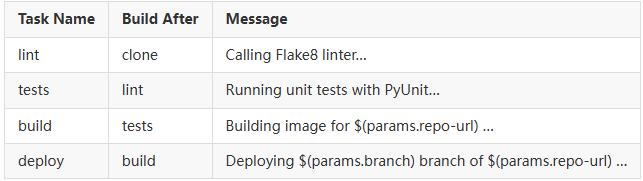

## Solution

```
---
apiVersion: tekton.dev/v1beta1
kind: Pipeline
metadata:
  name: cd-pipeline
spec:
  params:
    - name: repo-url
    - name: branch
      default: "master"
  tasks:
    - name: clone
      taskRef:
        name: checkout
      params:
      - name: repo-url
        value: "$(params.repo-url)"
      - name: branch
        value: "$(params.branch)"

    - name: lint
      taskRef:
        name: echo
      params:
      - name: message
        value: "Calling Flake8 linter..."
      runAfter:
        - clone

    - name: tests
      taskRef:
        name: echo
      params:
      - name: message
        value: "Running unit tests with PyUnit..."
      runAfter:
        - lint

    - name: build
      taskRef:
        name: echo
      params:
      - name: message
        value: "Building image for $(params.repo-url) ..."
      runAfter:
        - tests

    - name: deploy
      taskRef:
        name: echo
      params:
      - name: message
        value: "Deploying $(params.branch) branch of $(params.repo-url) ..."
      runAfter:
        - build
```

**Apply it to the cluster:** `kubectl apply -f pipeline.yaml`

# Step 11: Run the cd-pipeline

**Run the pipeline using the Tekton CLI:**
```
tkn pipeline start cd-pipeline \
    --showlog \
    -p repo-url="https://github.com/ibm-developer-skills-network/wtecc-CICD_PracticeCode.git" \
    -p branch="main"
```

**The output will look like this:**
```
PipelineRun started: cd-pipeline-run-wvfzx
Waiting for logs to be available...
[clone : checkout] Cloning into 'wtecc-CICD_PracticeCode'...

[lint : echo-message] Calling Flake8 linter...

[tests : echo-message] Running unit tests with PyUnit...

[build : echo-message] Building image for https://github.com/ibm-developer-skills-network/wtecc-CICD_PracticeCode.git ...

[deploy : echo-message] Deploying main branch of https://github.com/ibm-developer-skills-network/wtecc-CICD_PracticeCode.git ...
```

# Conclusion

**Congratulations!** 

You are now able to create a Tekton pipeline and pass parameters to a pipeline.

In this lab, you learned how to create a base pipeline, specify and pass parameteres to a task and pipeline. You learned how to modify your pipeline to reference the task and configure its parameters. You also learned how to pass additional parameters to a pipeline and how to run it to echo and clone a Git repository.

### task.yaml
```
apiVersion: tekton.dev/v1beta1
kind: Task
metadata:
  name: echo
spec:
  params:
    - name: message
      description: The message to echo
      type: string
  steps:
    - name: echo-message
      image: alpine:3
      command: [/bin/echo]
      args: ["$(params.message)"]

---


apiVersion: tekton.dev/v1beta1
kind: Task
metadata:
  name: checkout
spec:
  params:
    - name: repo-url
      description: The URL of the git repo to clone
      type: string
    - name: branch
      description: The branch to clone
      type: string
  steps:
    - name: checkout
      image: bitnami/git:latest
      command: [git]
      args: ["clone", "--branch", "$(params.branch)", "$(params.repo-url)"]
```

### pipeline.yaml
```
apiVersion: tekton.dev/v1beta1
kind: Pipeline
metadata:
  name: hello-pipeline
spec:
  params:
    - name: message
  tasks:
    - name: hello
      taskRef:
        name: echo
      params:
        - name: message
          value: "$(params.message)"

---

apiVersion: tekton.dev/v1beta1
kind: Pipeline
metadata:
  name: cd-pipeline
spec:
  params:
    - name: repo-url
    - name: branch
      default: "master"
  tasks:
    - name: clone
      taskRef:
        name: checkout
      params:
      - name: repo-url
        value: "$(params.repo-url)"
      - name: branch
        value: "$(params.branch)"

    - name: lint
      taskRef:
        name: echo
      params:
      - name: message
        value: "Calling Flake8 linter..."
      runAfter:
        - clone

    - name: tests
      taskRef:
        name: echo
      params:
      - name: message
        value: "Running unit tests with PyUnit..."
      runAfter:
        - lint

    - name: build
      taskRef:
        name: echo
      params:
      - name: message
        value: "Building image for $(params.repo-url) ..."
      runAfter:
        - tests

    - name: deploy
      taskRef:
        name: echo
      params:
      - name: message
        value: "Deploying $(params.branch) branch of $(params.repo-url) ..."
      runAfter:
        - build
```

## Commands
* `kubectl apply -f pipeline.yaml`
* `kubectl apply -f pipeline.yaml`

```
tkn pipeline start cd-pipeline \
    --showlog \
    -p repo-url="https://github.com/ibm-developer-skills-network/wtecc-CICD_PracticeCode.git" \
    -p branch="main"
```